In [29]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df=pd.read_csv("data.csv")
df.head()

/home/kishore/miniconda3/envs/ml310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1



,work_date,work_week,store_id,Site Name,metric,quantity,city
0,1/2/2015,12/28/2014,1232,Store A,Product A Produced,29,LA
1,1/2/2015,12/28/2014,1232,Store A,Hours Worked,98,LA
2,1/9/2015,1/4/2015,6453,Store B,Product B Produced,34,San Diego
3,1/9/2015,1/4/2015,6453,Store B,Product A Produced,77,San Diego
4,1/5/2015,1/4/2015,6453,Store B,Hours Worked,113,San Diego


In [53]:
dfq1=pd.DataFrame(columns=['new_city','sum_worked_hours','sum_quantity','pph'])
for i in df['city'].unique():
    dff=df[df['city']==i] 
    tot_hours=sum(dff[dff['metric']=='Hours Worked']['quantity'])
    tot_quantity=sum(dff[dff['metric']=='Product A Produced']['quantity'])
    dfq1=dfq1.append({'new_city':i,'sum_worked_hours':tot_hours,'sum_quantity':tot_quantity,'pph':float(tot_quantity/tot_hours)},ignore_index=True)
    # dfq1=dfq1.append({'sum_quantity':sum(dff[dff['metric']=='Product A Produced']['quantity'])},ignore_index=True)
    # dfq1=dfq1.append({'pph':tot_quantity/tot_hours},ignore_index=True)
print(dfq1)

        new_city sum_worked_hours sum_quantity       pph
0             LA            46224         7626  0.164979
1      San Diego           119176        39879  0.334623
2  San Francisco            43945        16212  0.368916
3      San Mateo            61019        18466  0.302627
4         Irvine            42869        12741  0.297208


/tmp/ipykernel_6576/1535271952.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_6576/1535271952.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_6576/1535271952.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_6576/1535271952.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_6576/1535271952.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



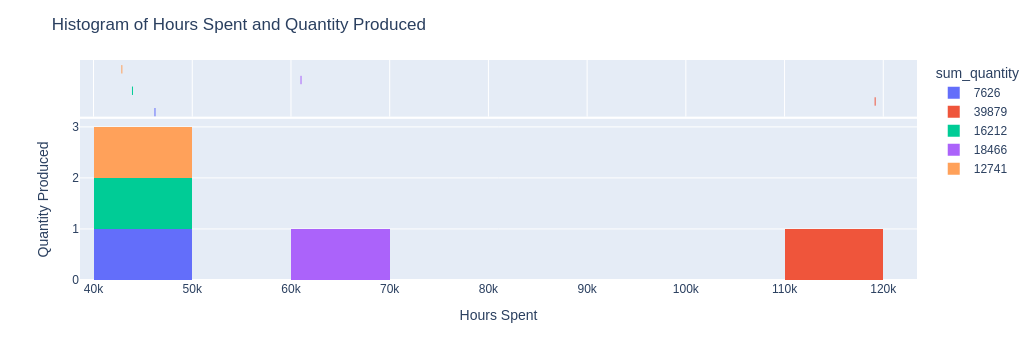

In [54]:
fig = px.histogram(dfq1, x='sum_worked_hours', nbins=10, marginal="rug", color='sum_quantity')
fig.update_layout(title_text='Histogram of Hours Spent and Quantity Produced',
                  xaxis_title_text='Hours Spent',
                  yaxis_title_text='Quantity Produced')
fig.show()

In [61]:
#time series analysis
dfq1 = dfq1.dropna()
dfq1['sum_quantity '] = dfq1['sum_quantity '].astype(float)
ts = dfq1['sum_quantity ']
plt.plot(ts)
plt.xlabel('Time')
plt.ylabel('PPH in Hours')
plt.title('PPH Time Series')
plt.show()

KeyError: 'sum_quantity '

In [56]:
train_data = ts[:int(0.8*len(ts))]
test_data = ts[int(0.8*len(ts)):]

In [57]:
model = ARIMA(train_data,order=(2,1,2))
model_fit = model.fit()

/home/kishore/miniconda3/envs/ml310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/home/kishore/miniconda3/envs/ml310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
predictions = model_fit.forecast(steps=len(test_data))[0]
print(predictions)

KeyError: 0

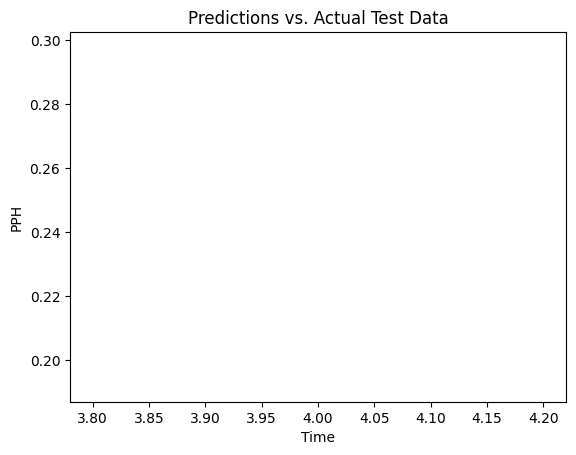

In [59]:
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.xlabel('Time')
plt.ylabel('PPH')
plt.title('Predictions vs. Actual Test Data')
plt.show()

In [60]:
mse = np.mean((predictions - test_data)**2)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.011018186580298055
